In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from utils import load_data, calculate_profit, dataset_balancer, select_best_features
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Loading data

In [2]:
TRAINING_DATA = "training_data.csv"

In [3]:
categorical_features = load_data("categorical_features.csv")
numerical_features = load_data("numerical_features.csv")
targets = load_data("targets.csv")

In [4]:
categorical_features = categorical_features.iloc[:, 1:]
categorical_features

,OSOURCE_-,OSOURCE_AGS,OSOURCE_AMB,OSOURCE_AML,OSOURCE_AWK,OSOURCE_BRE,OSOURCE_BRK,OSOURCE_BRY,OSOURCE_CLL,OSOURCE_CMM,...,RFA_24_S2D,RFA_24_S2E,RFA_24_S3D,RFA_24_S3E,RFA_24_S4D,RFA_24_U1D,RFA_2A_D,RFA_2A_E,RFA_2A_F,RFA_2A_G
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
95408,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
95409,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
95410,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [5]:
numerical_features = numerical_features.iloc[:, 1:]
numerical_features

,RFA_2F,NGIFTALL,LASTDATE,CARDPROM,HV1,HVP3,DMA,HVP5,IC5,HHAS3,...,NEXTDATE,RAMNT_14,MAXRDATE,RAMNT_12,RAMNT_8,RAMNT_16,MINRAMNT,ODATEDW,AVGGIFT,LASTGIFT
0,4,31,9512,27,479,13,682.0,47,12883,51,...,9003.000000,10.000000,9402,14.859901,15.673702,11.000000,5.0,8901,7.741935,10.0
1,2,3,9512,12,5468,98,803.0,99,36175,66,...,9504.000000,13.252321,9512,14.859901,15.673702,12.000000,10.0,9401,15.666667,25.0
2,4,27,9512,26,497,6,518.0,50,11576,31,...,9101.000000,9.000000,9207,11.000000,15.673702,9.000000,2.0,9001,7.481481,5.0
3,4,16,9512,27,1000,50,862.0,92,15130,26,...,8711.000000,10.000000,9411,10.000000,15.673702,7.000000,2.0,8701,6.812500,10.0
4,2,37,9601,43,576,2,528.0,67,9836,11,...,8005.000000,10.000000,9601,14.859901,15.000000,14.032142,3.0,8601,6.864865,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,1,1,9602,6,988,49,743.0,92,18807,70,...,9151.022917,13.252321,9602,14.859901,15.673702,14.032142,25.0,9601,25.000000,25.0
95408,1,1,9603,4,1679,88,618.0,97,26538,61,...,9151.022917,13.252321,9603,14.859901,15.673702,14.032142,20.0,9601,20.000000,20.0
95409,3,7,9610,14,376,0,551.0,9,12178,26,...,9501.000000,13.252321,9501,10.000000,10.000000,14.032142,3.0,9501,8.285714,10.0
95410,4,41,9701,36,2421,99,803.0,99,15948,46,...,8704.000000,13.252321,9608,14.859901,15.673702,18.000000,5.0,8601,12.146341,18.0


In [6]:
targets = targets.iloc[:, 1:]
targets

,TARGET_B
0,0
1,0
2,0
3,0
4,0
...,...
95407,0
95408,0
95409,0
95410,1


# Selecting best features

In [7]:
y = targets.to_numpy().ravel()
y

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [8]:
X = select_best_features(categorical_features, numerical_features, targets, 10, 50, 'corr')

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [10]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Balancing training data 

In [11]:
X_train, y_train = dataset_balancer(X_train, y_train)

# Random classification

In [12]:
from sklearn.dummy import DummyClassifier

num_of_attempts = 10
profit = 0

for _ in range(num_of_attempts):
    dummy_clf = DummyClassifier(strategy='stratified')
    dummy_clf.fit(X_train, y_train)
    y_pred = dummy_clf.predict(X_test)
    profit += calculate_profit(y_test, y_pred)

profit/num_of_attempts

-283.76399999999023

# Model selection

In [13]:
parameters = [
    {'priors': [[round(i*0.1, 2), round(1-i*0.1, 2)] for i in range(1, 10)]},
    {'C': [.001, .01, .1, 1., 10., 100.], 'max_iter': [1000, 3000]}

]

In [14]:
priors = [[round(i*0.1, 2), round(1-i*0.1, 2)] for i in range(1, 10)]
profits = []

for prior in priors:
    clf = GaussianNB(priors=prior)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    profits.append(calculate_profit(y_test, y_pred))

In [15]:
prior_str = [f"{prior[0]}-{prior[1]}" for prior in priors]

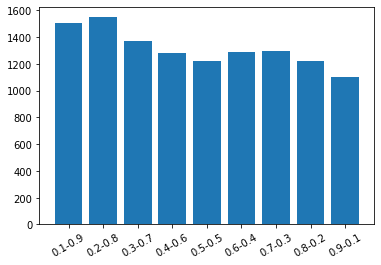

In [16]:
plt.bar(prior_str, profits)
plt.xticks(rotation=30)
plt.show()

In [17]:
c_values = [.001, .01, .1, 1., 10., 100.]
profits = []

for c in c_values:
    clf = LogisticRegression(C=c, max_iter=1000)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    profits.append(calculate_profit(y_test, y_pred))

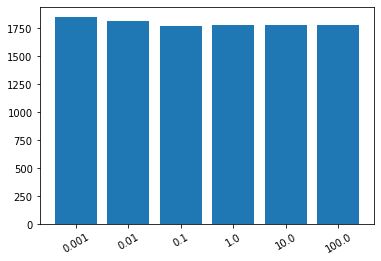

In [18]:
plt.bar(list(map(str, c_values)), profits)
plt.xticks(rotation=30)
plt.show()

In [19]:
depths = [3, 5, 7, 9, 11]
profits = []

for d in depths:
    clf = DecisionTreeClassifier(max_depth=d)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    profits.append(calculate_profit(y_test, y_pred))

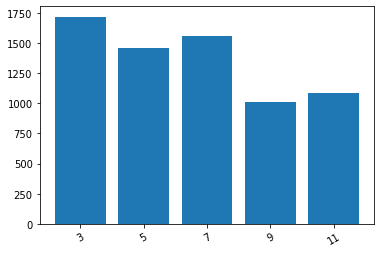

In [20]:
plt.bar(list(map(str, depths)), profits)
plt.xticks(rotation=30)
plt.show()

In [21]:
estimators = [50, 100, 150, 200]
profits = []

for estimator in estimators:
    clf = RandomForestClassifier(n_estimators=estimator)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    profits.append(calculate_profit(y_test, y_pred))

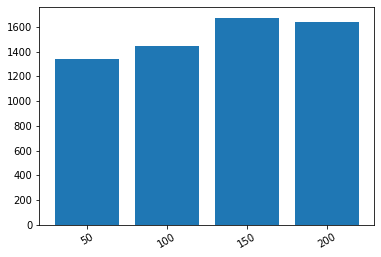

In [22]:
plt.bar(list(map(str, estimators)), profits)
plt.xticks(rotation=30)
plt.show()